<a href="https://colab.research.google.com/github/OlegBEZb/CV_advanced_course/blob/main/HW_2_image_classification/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/HW2CVcourse/Classification_data.zip -d /content/drive/MyDrive/HW2CVcourse/

In [2]:
!git clone https://github.com/OlegBEZb/CV_advanced_course.git

Cloning into 'CV_advanced_course'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 75 (delta 34), reused 38 (delta 11), pack-reused 0
Unpacking objects: 100% (75/75), 36.32 MiB | 9.43 MiB/s, done.


In [3]:
import sys
sys.path.append("/content/CV_advanced_course/HW_2_image_classification")

In [ ]:
!python /content/CV_advanced_course/HW_2_image_classification/train.py --train_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/train --test_data_dir /content/drive/MyDrive/HW2CVcourse/Classification_data/test --val_size 0.2 --dataset custom --epochs 2 --reduced_num 200

* to(device) takes a lot of time. Maybe some way to create tensors on GPU directly?
* upsampling\resizing also takes a lot of time. Check if size is already ok before.

# Imports

In [8]:
import os
from tqdm.notebook import tqdm

import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from eval import eval_clf

# Data reading

In [17]:
COLAB = True

if COLAB:
    data_path = '/content/drive/MyDrive/HW2CVcourse'
else:
    data_path = '.'

train_data_dir = os.path.join(data_path, 'Classification_data/train')
test_data_dir = os.path.join(data_path, 'Classification_data/test')

img_width, img_height = 150, 150

classes = [c for c in os.listdir(train_data_dir) if not c.startswith('.')]
classes

['forest', 'glacier', 'mountain', 'sea', 'street', 'buildings']

forest 2271


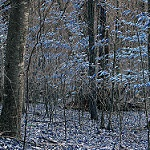

glacier 2404


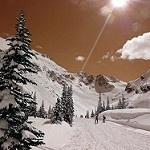

mountain 2512


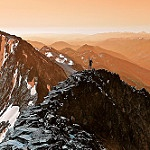

sea 2274


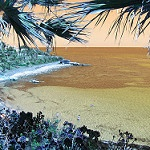

street 2382


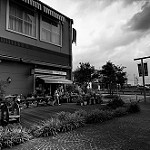

buildings 2191


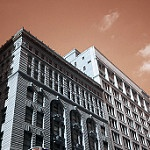

In [ ]:
image_name_dict = {}
for c in classes:
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    print(c, len(image_names))
    image_name_dict[c] = image_names
    image = cv2.imread(os.path.join(train_data_dir, c, image_names[0]))
    display(Image.fromarray(image))

In [ ]:
total = 0
for k, v in image_name_dict.items():
    class_items_num = len(v)
    print(k, class_items_num)
    total += class_items_num
print('total', total)

forest 2271
glacier 2404
mountain 2512
sea 2274
street 2382
buildings 2191
total 14034


# Classification

## Classic

### Features

#### Load

In [ ]:
X_train_list = []
y_train = []
i = 0
for c in tqdm(classes, total=len(classes)):
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    for img_name in tqdm(image_names, total=len(image_names)):
        image = cv2.imread(os.path.join(train_data_dir, c, img_name))
        if image.shape == (150, 150, 3):
            X_train_list.append(image)
            y_train.append(c)
            i += 1
        else:
            print(os.path.join(train_data_dir, c, img_name), 'was not processed with shape', image.shape)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2271 [00:00<?, ?it/s]

./Classification_data/train/forest/14609.jpg was not processed with shape (115, 150, 3)
./Classification_data/train/forest/12108.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/5483.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/forest/5643.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/15776.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/forest/14315.jpg was not processed with shape (133, 150, 3)
./Classification_data/train/forest/7174.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/forest/1004.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2191 [00:00<?, ?it/s]

./Classification_data/train/buildings/5358.jpg was not processed with shape (124, 150, 3)


  0%|          | 0/2404 [00:00<?, ?it/s]

./Classification_data/train/glacier/5135.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/1740.jpg was not processed with shape (134, 150, 3)
./Classification_data/train/glacier/17528.jpg was not processed with shape (142, 150, 3)
./Classification_data/train/glacier/15103.jpg was not processed with shape (149, 150, 3)
./Classification_data/train/glacier/2837.jpg was not processed with shape (76, 150, 3)
./Classification_data/train/glacier/12634.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/17611.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/glacier/11110.jpg was not processed with shape (105, 150, 3)
./Classification_data/train/glacier/18110.jpg was not processed with shape (102, 150, 3)
./Classification_data/train/glacier/16472.jpg was not processed with shape (143, 150, 3)
./Classification_data/train/glacier/16710.jpg was not processed with shape (146, 150, 3)
./Classification_data/tra

  0%|          | 0/2382 [00:00<?, ?it/s]

./Classification_data/train/street/13747.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2512 [00:00<?, ?it/s]

./Classification_data/train/mountain/8163.jpg was not processed with shape (147, 150, 3)
./Classification_data/train/mountain/16971.jpg was not processed with shape (103, 150, 3)
./Classification_data/train/mountain/9286.jpg was not processed with shape (131, 150, 3)
./Classification_data/train/mountain/13200.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/mountain/16041.jpg was not processed with shape (144, 150, 3)
./Classification_data/train/mountain/4513.jpg was not processed with shape (100, 150, 3)
./Classification_data/train/mountain/13656.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/mountain/17021.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/mountain/14462.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/mountain/7400.jpg was not processed with shape (81, 150, 3)
./Classification_data/train/mountain/5171.jpg was not processed with shape (143, 150, 3)
./Classification

  0%|          | 0/2274 [00:00<?, ?it/s]

./Classification_data/train/sea/5584.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/19551.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/341.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/357.jpg was not processed with shape (140, 150, 3)


In [ ]:
len(X_train_list)

13986

#### Split

In [ ]:
X_train_list, X_val_list, y_train, y_val = train_test_split(X_train_list,
                                                            y_train,
                                                            stratify=y_train,
                                                            random_state=42,
                                                            test_size=0.2)

#### Plain vector

In [ ]:
X_train_plain = np.stack(X_train_list)
X_train_plain.shape

(11188, 150, 150, 3)

In [ ]:
X_train_plain = np.reshape(X_train_plain, (X_train_plain.shape[0], -1))
X_train_plain.shape

(11188, 67500)

In [ ]:
X_val_plain = np.stack(X_val_list)
X_val_plain = np.reshape(X_val_plain, (X_val_plain.shape[0], -1))
X_val_plain.shape

(2798, 67500)

#### Histogram
https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
    [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [ ]:
extract_color_histogram(image).shape

(512,)

In [ ]:
X_train_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_train_list, total=len(X_train_list))
]

X_train_hist = np.stack(X_train_hist)
X_train_hist.shape

  0%|          | 0/11188 [00:00<?, ?it/s]

(11188, 512)

In [ ]:
X_val_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_val_list, total=len(X_val_list))
]

X_val_hist = np.stack(X_val_hist)
X_val_hist.shape

  0%|          | 0/2798 [00:00<?, ?it/s]

(2798, 512)

### KNN
https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280
Play with params? neighbours, metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Plain

              precision    recall  f1-score   support

   buildings       0.93      0.50      0.65      1732
      forest       0.78      0.74      0.76      1805
     glacier       0.61      0.66      0.64      1925
    mountain       0.46      0.83      0.59      1975
         sea       0.48      0.64      0.55      1846
      street       0.96      0.24      0.38      1905

    accuracy                           0.60     11188
   macro avg       0.70      0.60      0.59     11188
weighted avg       0.70      0.60      0.59     11188



0.6

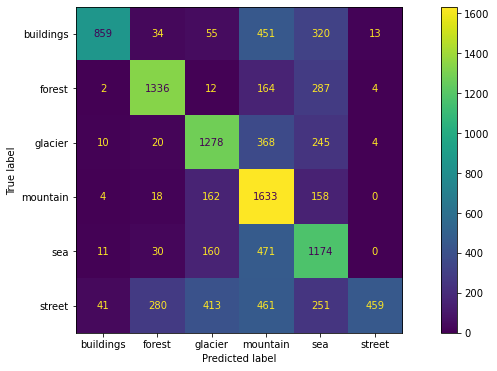

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_plain, y_train)
y_train_pred = neigh.predict(X_train_plain)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.58      0.08      0.14       458
      forest       0.63      0.46      0.53       458
     glacier       0.42      0.41      0.41       462
    mountain       0.35      0.72      0.47       520
         sea       0.22      0.42      0.29       424
      street       0.84      0.13      0.23       476

    accuracy                           0.38      2798
   macro avg       0.51      0.37      0.35      2798
weighted avg       0.51      0.38      0.35      2798



0.38

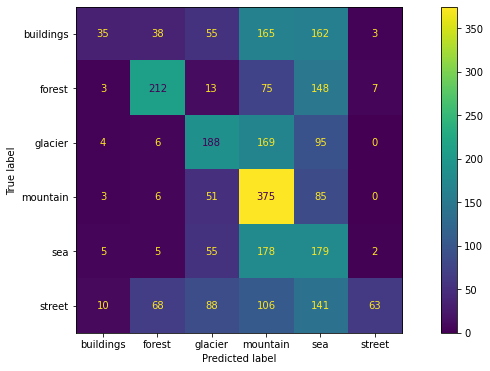

In [ ]:
y_val_pred = neigh.predict(X_val_plain)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference buildings


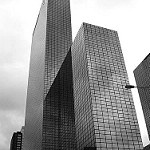

dist 17249.96921736384 class sea


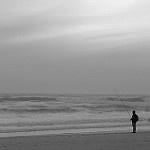

dist 17320.570660344885 class buildings


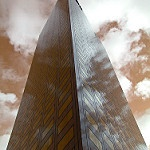

dist 17420.37413490307 class mountain


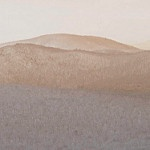

dist 17425.952513420896 class mountain


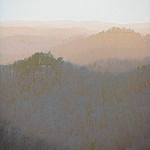

dist 17467.633211170883 class mountain


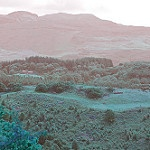

In [ ]:
val_idx = 10
reference = X_val_plain[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

#### Hist

              precision    recall  f1-score   support

   buildings       0.50      0.79      0.62      1732
      forest       0.78      0.92      0.84      1805
     glacier       0.62      0.77      0.69      1925
    mountain       0.80      0.51      0.62      1975
         sea       0.79      0.49      0.60      1846
      street       0.78      0.64      0.70      1905

    accuracy                           0.68     11188
   macro avg       0.71      0.69      0.68     11188
weighted avg       0.72      0.68      0.68     11188



0.68

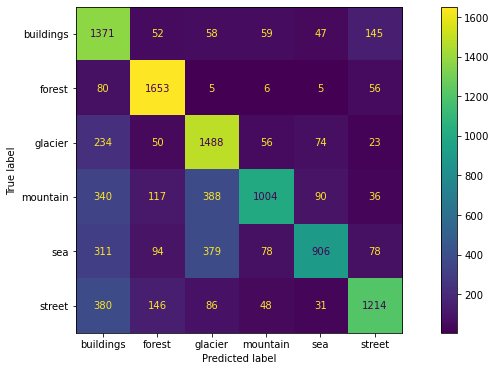

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_hist, y_train)
y_train_pred = neigh.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.29      0.45      0.35       458
      forest       0.69      0.85      0.76       458
     glacier       0.43      0.56      0.49       462
    mountain       0.47      0.24      0.32       520
         sea       0.42      0.26      0.32       424
      street       0.53      0.43      0.47       476

    accuracy                           0.46      2798
   macro avg       0.47      0.47      0.45      2798
weighted avg       0.47      0.46      0.45      2798



0.46

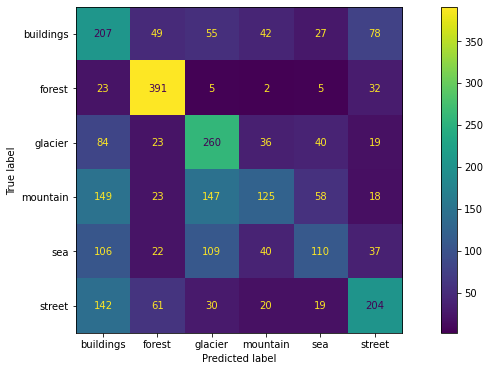

In [ ]:
y_val_pred = neigh.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference glacier


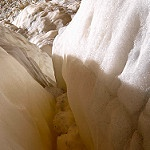

dist 0.5834561769247257 class mountain


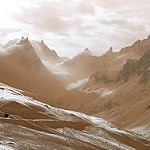

dist 0.6468423733799108 class mountain


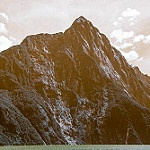

dist 0.6650135634767171 class sea


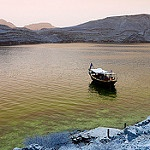

dist 0.7379049724841951 class glacier


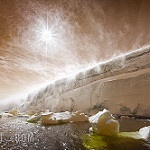

dist 0.750292204519228 class glacier


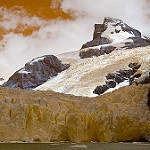

In [ ]:
val_idx = 200
reference = X_val_hist[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

### SVM

In [ ]:
from sklearn.svm import SVC

#### Plain
infinite

In [ ]:
# svc = SVC()
# svc.fit(X_train_plain, y_train)
# y_train_pred = svc.predict(X_train_plain)
# eval_clf(y_test=y_train, y_pred=y_train_pred)

In [ ]:
# y_val_pred = svc.predict(X_val_plain)
# eval_clf(y_test=y_val, y_pred=y_val_pred)

#### Hist

              precision    recall  f1-score   support

   buildings       0.72      0.56      0.63      1732
      forest       0.93      0.87      0.90      1805
     glacier       0.69      0.80      0.74      1925
    mountain       0.73      0.70      0.72      1975
         sea       0.73      0.68      0.70      1846
      street       0.67      0.80      0.73      1905

    accuracy                           0.74     11188
   macro avg       0.74      0.73      0.74     11188
weighted avg       0.74      0.74      0.74     11188



0.74

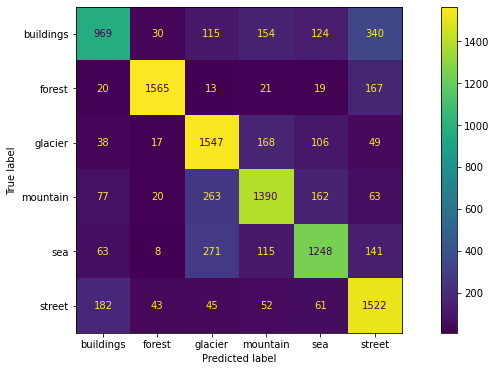

In [ ]:
svc = SVC()
svc.fit(X_train_hist, y_train)
y_train_pred = svc.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.46      0.34      0.39       458
      forest       0.88      0.82      0.85       458
     glacier       0.56      0.68      0.62       462
    mountain       0.59      0.54      0.56       520
         sea       0.48      0.47      0.47       424
      street       0.51      0.62      0.56       476

    accuracy                           0.58      2798
   macro avg       0.58      0.58      0.58      2798
weighted avg       0.58      0.58      0.58      2798



0.58

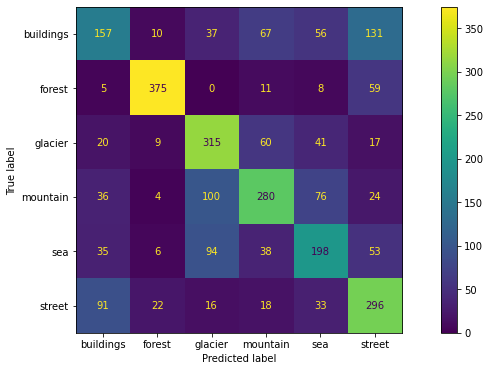

In [ ]:
y_val_pred = svc.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

### Lin

## CNN+MLP with your own architecture

1. Frameworks? Make overview based on some papers/articles
    * TF Lite - optimizations for CPU (for Intel use openVINO)
    * TensorRT - optimizations for specific NVIDIA GPU
    * Torch -> ONNX -> TF Lite
    * NVIDIA Triton and DeepStream for optimized inference https://www.reddit.com/r/computervision/comments/p1xasr/nvidia_deepstream_triton_server_jetson_nano/
2. Wrappers like lightning or catalyst? Вкусовщина, but it's always safer to use pure torch
3. Best practices? Loaders (batch)? 

torch-vision?

https://saptarshidatta.in/2021/06/13/mlp_cnn_cifar100.html

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [10]:
torchvision.get_image_backend()

'PIL'

In [11]:
# torchvision.set_image_backend('accimage')

In [12]:
torch.cuda.is_available()

True

In [13]:
torch.cuda.device_count()

1

In [14]:
torch.cuda.current_device()

0

In [15]:
torch.cuda.get_device_name(0)

'Tesla T4'

discussion about loading approaches https://tcapelle.github.io/pytorch/fastai/2021/02/26/image_resizing.html

In [30]:
from train import get_dataloaders

train_dataloader, val_dataloader, test_dataloader = get_dataloaders(
    train_data_dir=train_data_dir, test_data_dir=test_data_dir, 
    val_size=0.2,  transform=transforms.Compose([
        transforms.Resize((img_width, img_height)),
            transforms.ToTensor(),  # 
        ]),
        transform_test=transforms.Resize([img_width, img_height]))

len(train_dataloader), len(val_dataloader), len(test_dataloader)

(176, 44, 47)

In [28]:
# train_dataloader.dataset.classes use for number of classes

Feature batch shape: torch.Size([64, 3, 150, 150])
Labels batch shape: torch.Size([64])


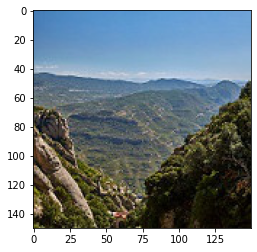

Label: 1


In [31]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
try:
    label = train_dataloader.dataset.target_transform.inverse_transform([train_labels[0]])
except:
    label = train_labels[0]
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()
print(f"Label: {label}")

Used this article for shapes calculation
https://learnopencv.com/number-of-parameters-and-tensor-sizes-in-convolutional-neural-network/

In [32]:
from models import CNN_MLP_network, CNN_network
from train import get_preds, EarlyStopper, train_nn

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

### CNN_MLP

In [ ]:
model = CNN_MLP_network(num_classes=len(train_dataset.classes))
print(model)

CNN_MLP_network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=18496, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (out): Linear(in_features=84, out_features=6, bias=True)
)


In [ ]:
model = model.to(device)
next(model.parameters()).is_cuda # returns a boolean

>>> Training Start >>>


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       439
           1       0.89      0.84      0.87       455
           2       0.70      0.57      0.63       481
           3       0.59      0.73      0.66       503
           4       0.59      0.53      0.56       455
           5       0.70      0.80      0.75       477

    accuracy                           0.67      2810
   macro avg       0.68      0.67      0.67      2810
weighted avg       0.68      0.67      0.67      2810

epoch: 0 train_loss: 150.7524295449257 val_loss: tensor(0.8850, device='cuda:0') val f1: 0.67


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       439
           1       0.93      0.81      0.87       455
           2       0.71      0.61      0.66       481
           3       0.62      0.69      0.65       503
           4       0.60      0.57      0.58       455
           5       0.68      0.84      0.75       477

    accuracy                           0.68      2810
   macro avg       0.69      0.68      0.68      2810
weighted avg       0.69      0.68      0.68      2810

epoch: 1 train_loss: 135.70240902900696 val_loss: tensor(0.8647, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       439
           1       0.94      0.82      0.87       455
           2       0.61      0.76      0.68       481
           3       0.60      0.72      0.66       503
           4       0.77      0.36      0.49       455
           5       0.71      0.82      0.76       477

    accuracy                           0.68      2810
   macro avg       0.70      0.68      0.68      2810
weighted avg       0.70      0.68      0.68      2810

epoch: 2 train_loss: 123.15994408726692 val_loss: tensor(0.8439, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.49      0.76      0.60       439
           1       0.87      0.89      0.88       455
           2       0.76      0.52      0.61       481
           3       0.74      0.59      0.66       503
           4       0.66      0.64      0.65       455
           5       0.74      0.75      0.75       477

    accuracy                           0.69      2810
   macro avg       0.71      0.69      0.69      2810
weighted avg       0.71      0.69      0.69      2810

epoch: 3 train_loss: 112.88308882713318 val_loss: tensor(0.8951, device='cuda:0') val f1: 0.69


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.76      0.36      0.49       439
           1       0.91      0.85      0.88       455
           2       0.66      0.63      0.64       481
           3       0.66      0.64      0.65       503
           4       0.51      0.77      0.62       455
           5       0.72      0.82      0.77       477

    accuracy                           0.68      2810
   macro avg       0.70      0.68      0.67      2810
weighted avg       0.70      0.68      0.67      2810

epoch: 4 train_loss: 103.65235117077827 val_loss: tensor(0.9147, device='cuda:0') val f1: 0.68


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       439
           1       0.74      0.94      0.83       455
           2       0.68      0.73      0.71       481
           3       0.63      0.72      0.67       503
           4       0.80      0.47      0.59       455
           5       0.81      0.65      0.72       477

    accuracy                           0.70      2810
   macro avg       0.71      0.70      0.70      2810
weighted avg       0.71      0.70      0.70      2810

epoch: 5 train_loss: 87.62339544296265 val_loss: tensor(0.8494, device='cuda:0') val f1: 0.7
>>> Training Complete >>>


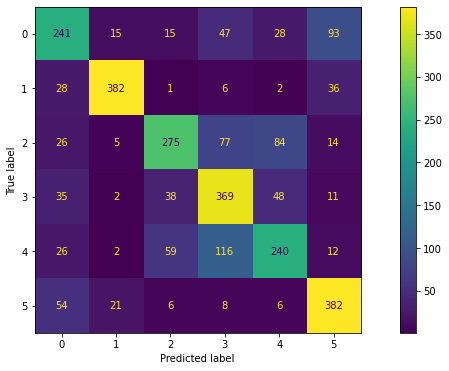

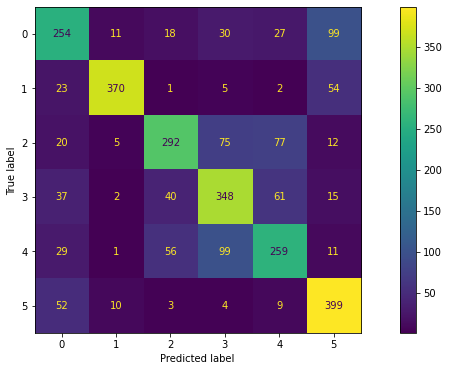

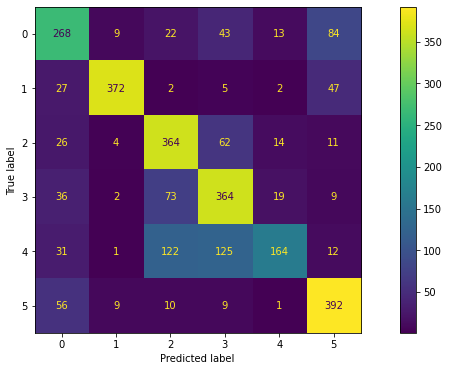

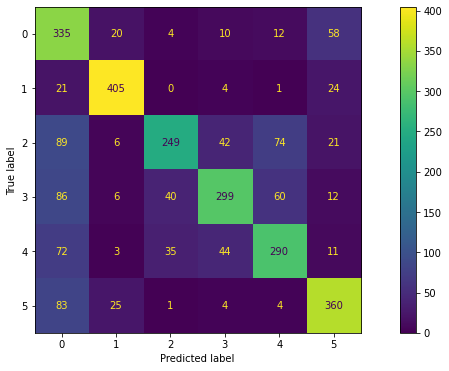

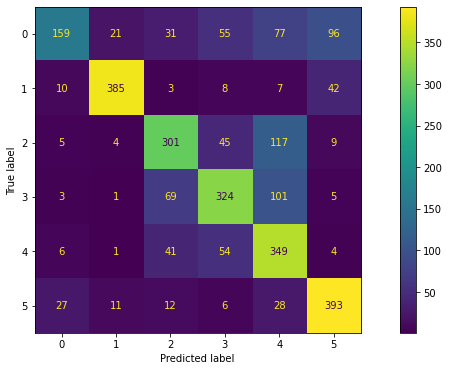

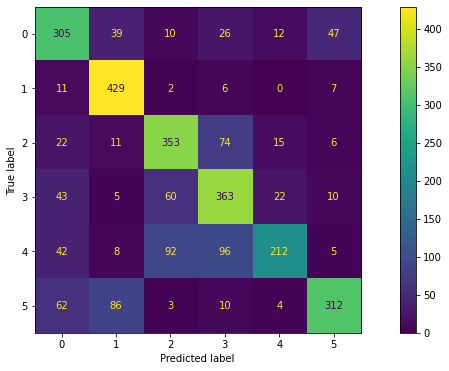

In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper)

### CNN

In [34]:
model = CNN_network(num_classes=len(train_dataloader.dataset.classes))
model = model.to(device)
next(model.parameters()).is_cuda # returns a boolean

True

In [35]:
print(model)

CNN_network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (out): Linear(in_features=18496, out_features=6, bias=True)
)


In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper, device, epochs=5)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

## Finetuned CNN

TODO: consider some kind of normalization to take manage different dataset statistics

TODO: does the model contain input normalization. What kind of input it expects

In [ ]:
import torchvision
model = torchvision.models.wide_resnet50_2(pretrained=True)

for param in model.parameters():
    param.required_grad = False

num_ftrt = model.fc.in_features

model.fc = nn.Linear(num_ftrt, len(train_dataset.classes))
model.to(device)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

>>> Training Start >>>


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       439
           1       0.91      0.96      0.94       455
           2       0.63      0.75      0.68       481
           3       0.70      0.62      0.66       503
           4       0.81      0.71      0.76       455
           5       0.79      0.89      0.83       477

    accuracy                           0.77      2810
   macro avg       0.78      0.77      0.77      2810
weighted avg       0.78      0.77      0.77      2810

epoch: 0 train_loss: 264.70397090911865 val_loss: tensor(1.1463, device='cuda:0') val f1: 0.77


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       439
           1       0.95      0.97      0.96       455
           2       0.77      0.77      0.77       481
           3       0.77      0.78      0.77       503
           4       0.90      0.86      0.88       455
           5       0.89      0.92      0.91       477

    accuracy                           0.86      2810
   macro avg       0.86      0.86      0.86      2810
weighted avg       0.86      0.86      0.86      2810

epoch: 1 train_loss: 153.75007647275925 val_loss: tensor(0.6912, device='cuda:0') val f1: 0.86


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       439
           1       0.95      0.98      0.97       455
           2       0.79      0.80      0.80       481
           3       0.81      0.77      0.79       503
           4       0.90      0.91      0.90       455
           5       0.92      0.90      0.91       477

    accuracy                           0.87      2810
   macro avg       0.88      0.88      0.88      2810
weighted avg       0.87      0.87      0.87      2810

epoch: 2 train_loss: 96.29451990127563 val_loss: tensor(0.4945, device='cuda:0') val f1: 0.87


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       439
           1       0.95      0.98      0.96       455
           2       0.83      0.80      0.81       481
           3       0.83      0.81      0.82       503
           4       0.92      0.93      0.92       455
           5       0.91      0.92      0.92       477

    accuracy                           0.89      2810
   macro avg       0.89      0.89      0.89      2810
weighted avg       0.89      0.89      0.89      2810

epoch: 3 train_loss: 69.74058681726456 val_loss: tensor(0.3870, device='cuda:0') val f1: 0.89


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.96      0.98      0.97       455
           2       0.84      0.79      0.81       481
           3       0.81      0.82      0.82       503
           4       0.92      0.94      0.93       455
           5       0.92      0.94      0.93       477

    accuracy                           0.90      2810
   macro avg       0.90      0.90      0.90      2810
weighted avg       0.90      0.90      0.90      2810

epoch: 4 train_loss: 56.66673944890499 val_loss: tensor(0.3397, device='cuda:0') val f1: 0.9


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.97      0.98      0.97       455
           2       0.84      0.80      0.82       481
           3       0.84      0.84      0.84       503
           4       0.93      0.95      0.94       455
           5       0.92      0.94      0.93       477

    accuracy                           0.90      2810
   macro avg       0.90      0.91      0.91      2810
weighted avg       0.90      0.90      0.90      2810

epoch: 5 train_loss: 48.12851259112358 val_loss: tensor(0.3152, device='cuda:0') val f1: 0.9


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.98      0.98      0.98       455
           2       0.85      0.81      0.83       481
           3       0.84      0.85      0.85       503
           4       0.93      0.95      0.94       455
           5       0.92      0.95      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 6 train_loss: 43.411529526114464 val_loss: tensor(0.2875, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.85      0.81      0.83       481
           3       0.83      0.84      0.84       503
           4       0.94      0.94      0.94       455
           5       0.94      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 7 train_loss: 37.3963727876544 val_loss: tensor(0.2786, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.88      0.81      0.84       481
           3       0.84      0.87      0.86       503
           4       0.93      0.94      0.94       455
           5       0.94      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 8 train_loss: 34.12271985411644 val_loss: tensor(0.2750, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       439
           1       0.96      0.98      0.97       455
           2       0.87      0.81      0.84       481
           3       0.84      0.87      0.85       503
           4       0.93      0.95      0.94       455
           5       0.93      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 9 train_loss: 31.759031429886818 val_loss: tensor(0.2676, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       439
           1       0.97      0.98      0.97       455
           2       0.87      0.82      0.84       481
           3       0.84      0.87      0.85       503
           4       0.95      0.95      0.95       455
           5       0.94      0.94      0.94       477

    accuracy                           0.92      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.92      0.92      0.92      2810

epoch: 10 train_loss: 28.576186202466488 val_loss: tensor(0.2564, device='cuda:0') val f1: 0.92


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.98       455
           2       0.88      0.81      0.84       481
           3       0.85      0.87      0.86       503
           4       0.94      0.95      0.95       455
           5       0.93      0.95      0.94       477

    accuracy                           0.91      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 11 train_loss: 27.23617957159877 val_loss: tensor(0.2608, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 1


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       439
           1       0.98      0.98      0.98       455
           2       0.87      0.80      0.84       481
           3       0.83      0.88      0.85       503
           4       0.95      0.95      0.95       455
           5       0.93      0.94      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 12 train_loss: 23.617598813027143 val_loss: tensor(0.2593, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 2


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       439
           1       0.97      0.98      0.98       455
           2       0.86      0.82      0.84       481
           3       0.86      0.86      0.86       503
           4       0.95      0.96      0.95       455
           5       0.93      0.93      0.93       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 13 train_loss: 21.973021164536476 val_loss: tensor(0.2482, device='cuda:0') val f1: 0.91


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.86      0.83      0.84       481
           3       0.86      0.86      0.86       503
           4       0.95      0.96      0.96       455
           5       0.93      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 14 train_loss: 20.27987962961197 val_loss: tensor(0.2554, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 1


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       439
           1       0.97      0.98      0.97       455
           2       0.87      0.81      0.84       481
           3       0.84      0.88      0.86       503
           4       0.95      0.95      0.95       455
           5       0.93      0.94      0.94       477

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810

epoch: 15 train_loss: 18.071855440735817 val_loss: tensor(0.2518, device='cuda:0') val f1: 0.91
Early stopping became worse. Now counter is 2


  0%|          | 0/176 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       439
           1       0.98      0.98      0.98       455
           2       0.88      0.83      0.85       481
           3       0.85      0.89      0.87       503
           4       0.94      0.95      0.95       455
           5       0.93      0.94      0.93       477

    accuracy                           0.92      2810
   macro avg       0.92      0.92      0.92      2810
weighted avg       0.92      0.92      0.92      2810

epoch: 16 train_loss: 16.384461814537644 val_loss: tensor(0.2550, device='cuda:0') val f1: 0.92
Early stopping became worse. Now counter is 3
>>> Training Complete >>>


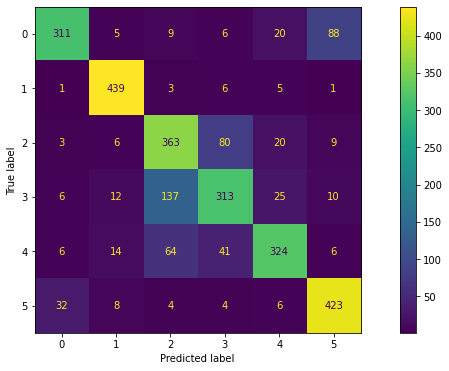

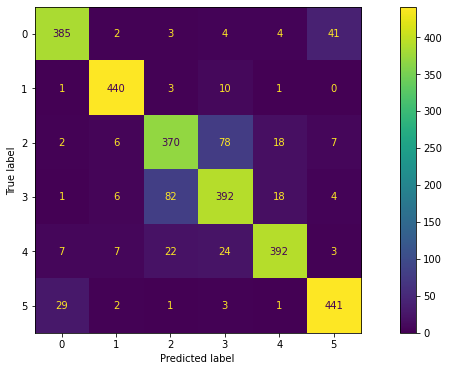

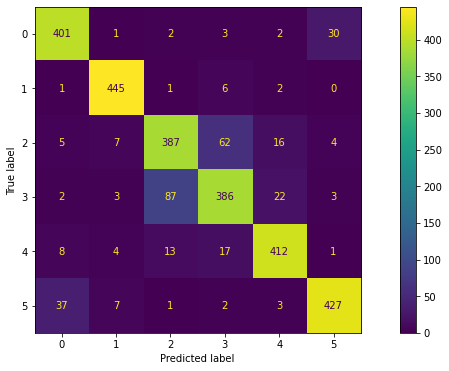

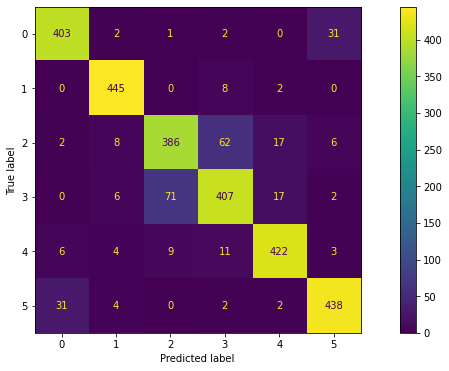

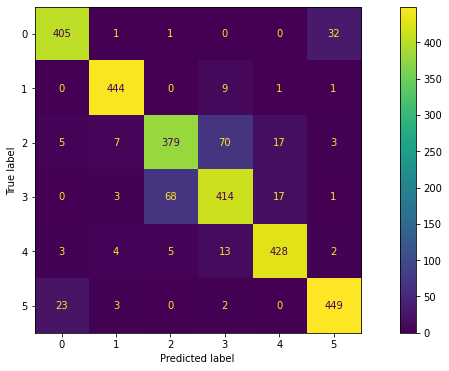

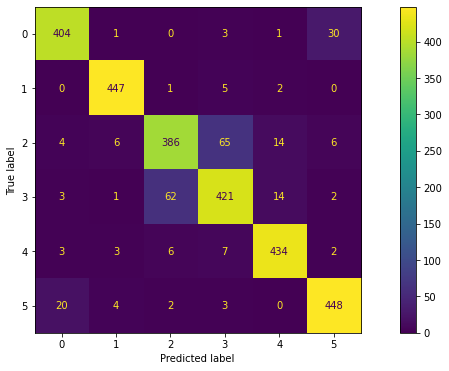

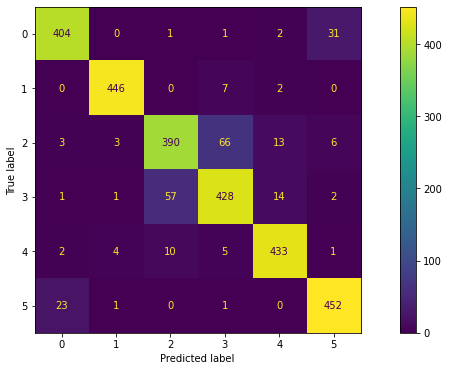

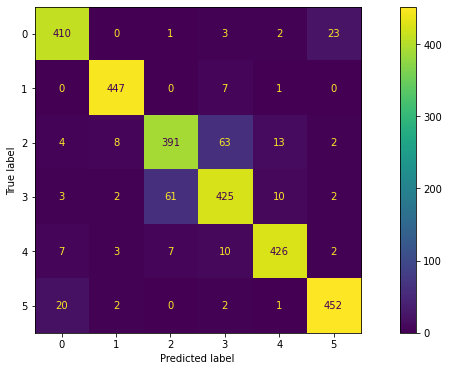

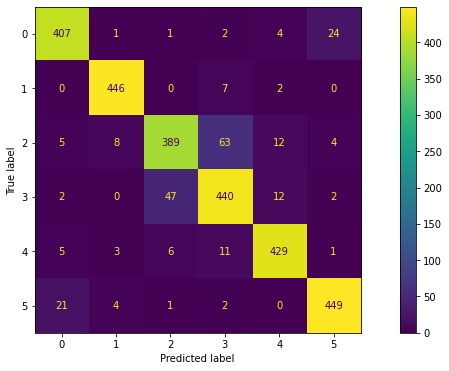

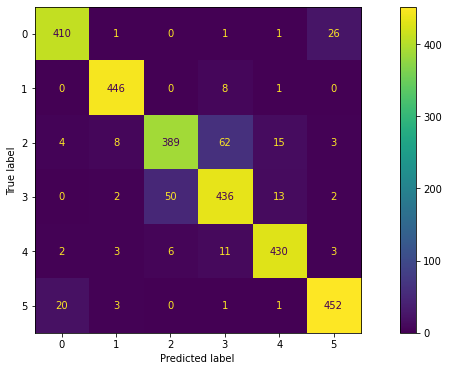

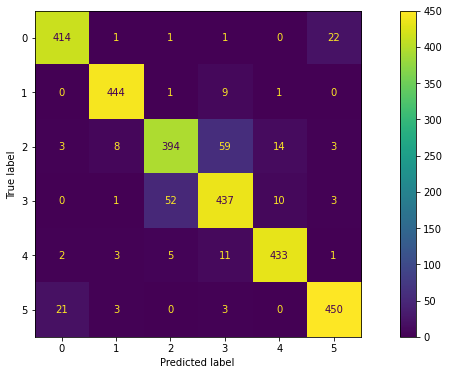

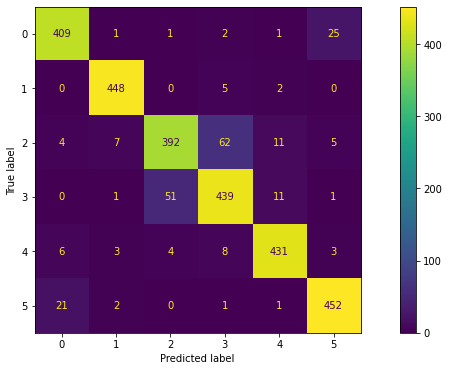

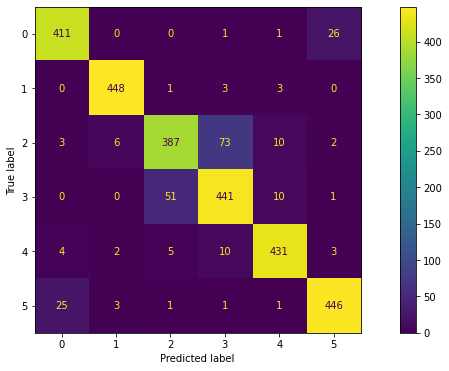

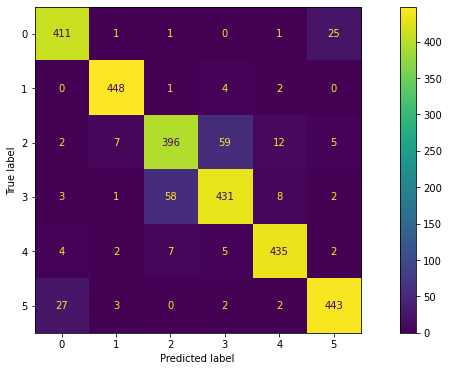

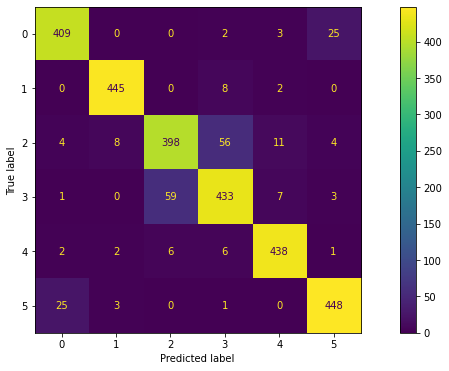

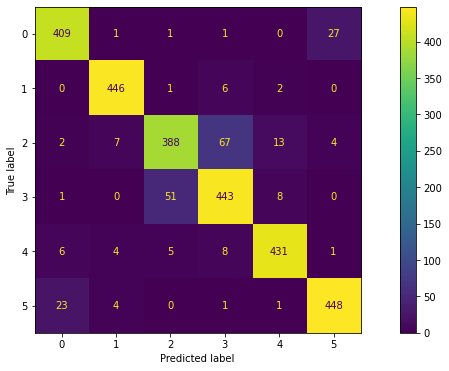

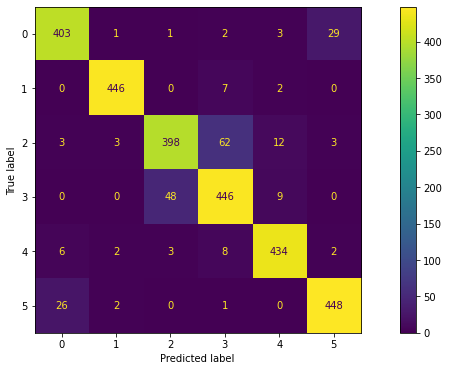

In [ ]:
early_stopper = EarlyStopper(patience=3)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
train_nn(model, train_dataloader, val_dataloader, optimizer, early_stopper)

nn. vs F.
conv2d
cross_entropy